#**Machine Learning Modeling Assignement**


###**Part 1: Data selection and Problem Definition**

Do factors like  the 'gender of the student, race/ethnicity of the student, the level of education of their parents, the type of lunch they eat and the completion of a test preparation course' have any impact on the student performance in the exams?

###**Student Performance in Exams Dataset_Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
#Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00


In [4]:
#Load dataset
df= pd.read_csv("/content/drive/MyDrive/AI and ML/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
#Dataset shape
df.shape


(1000, 10)

In [68]:
#Datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Total Score                  1000 non-null   int64 
 9   Result                       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None


In [69]:
# Generate descriptive statistics of the dataset
print(df.describe())

       math score  reading score  writing score  Total Score
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000   203.312000
std      15.16308      14.600192      15.195657    42.771978
min       0.00000      17.000000      10.000000    27.000000
25%      57.00000      59.000000      57.750000   175.000000
50%      66.00000      70.000000      69.000000   205.000000
75%      77.00000      79.000000      79.000000   233.000000
max     100.00000     100.000000     100.000000   300.000000


###**Part 2: Data Preprocessing for ML**
###**2.1 Feature Engineering**

In [70]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [71]:
#Check for missing values
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
Total Score,0
Result,0


In [72]:
#Categorical variables
df.select_dtypes('object').nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
Result,2


In [77]:
#predicting categorical outcomes
df['gender'].unique()
print(df['gender'].unique())

df['race/ethnicity'].unique()
print(df['race/ethnicity'].unique())

df['parental level of education'].unique()
print(df['parental level of education'].unique())

df['lunch'].unique()
print(df['lunch'].unique())

df['test preparation course'].unique()
print(df['test preparation course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [76]:
#Predicting numerical variables
df['math score'].unique()
print(df['math score'].unique())

df['reading score'].unique()
print(df['reading score'].unique())

df['writing score'].unique()
print(df['writing score'].unique())

[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  48  42  87  49  10  34  71  37  56  41  22  81  45  36  89  47  90 100
  64  98  51  40  84  69  33  60  85  91  77  27  94  95  19  35  32  96
  97  99  15  30  23]


In [83]:
#Calculate total score (reading score + math score + writing score)
df['Total Score']=df['math score']+df['reading score']+df['writing score']
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass
1,female,group C,some college,standard,completed,69,90,88,247,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,Pass


In [84]:
#Create a row with a passing grade
def assign_result(row):
    if row['math score'] > 50 and row['reading score'] > 50 and row['writing score'] > 50 and row['Total Score'] > 150:
        return 'Pass'
    else:
        return 'Fail'

df['Result'] = df.apply(assign_result, axis=1)
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Pass
1,female,group C,some college,standard,completed,69,90,88,247,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Fail
4,male,group C,some college,standard,none,76,78,75,229,Pass


In [85]:
#How many students passed and how many failed
df['Result'].value_counts()

,count
Result,
Pass,796
Fail,204


Text(0.5, 1.0, 'Percentage of students Result')

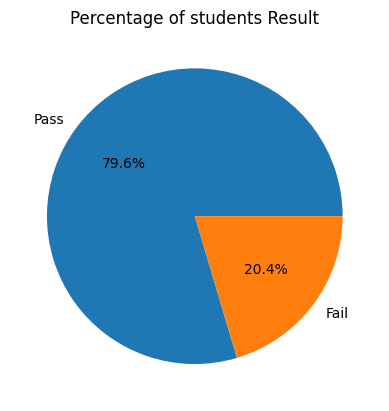

In [87]:
#Visualise percentage of student result
plt.pie(df['Result'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Result')

In [88]:
#Gender details
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [90]:
#Percentage of female students that passed
print("Percentage of female students passed: {0:.2f}%"
    .format((df[(df['gender']=='female') & (df['Result']=='Pass')].shape[0]
             /df[df['gender']=='female'].shape[0])*100))


Percentage of female students passed: 80.69%


In [91]:
#Percentage of male students that passed
print("Percentage of male students passed: {0:.2f}%"
    .format((df[(df['gender']=='male') & (df['Result']=='Pass')].shape[0]
             /df[df['gender']=='male'].shape[0])*100))

Percentage of male students passed: 78.42%


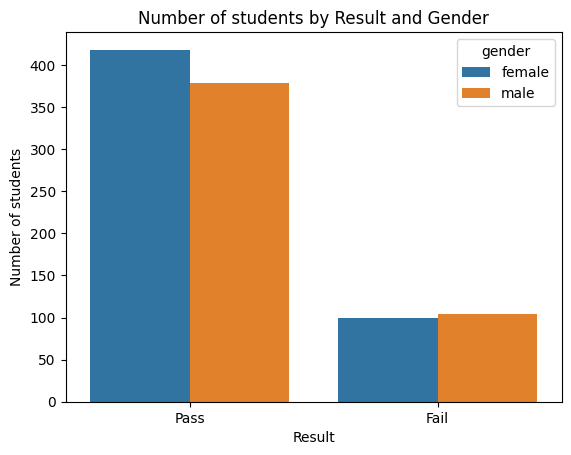

In [119]:
#Visualise the Result for both males and females
sns.countplot(data=df, x='Result', hue='gender')
plt.ylabel('Number of students')
plt.title('Number of students by Result and Gender')
plt.show()

##**2.2 Categorical Variable Encoding**

In [94]:
#one hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
df_encoded.head()


,math score,reading score,writing score,Total Score,Result,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,218,Pass,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,69,90,88,247,Pass,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,90,95,93,278,Pass,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,47,57,44,148,Fail,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,76,78,75,229,Pass,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [98]:
#label encoding for ordinal variables
label_encoder = LabelEncoder()
df_encoded['Result'] = label_encoder.fit_transform(df_encoded['Result'])
df_encoded.head()

,math score,reading score,writing score,Total Score,Result,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,218,1,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,69,90,88,247,1,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,90,95,93,278,1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,47,57,44,148,0,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,76,78,75,229,1,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


###**Observations**


1.   One-hot encoding is the suitable way to handle the categorical data since the cardinality of the features in low.
2.   Target encoding and Binary encoding are better suited for high cardinality



###**2.3 Feature Scaling**

In [99]:
#standardScaler (z-score normalisation)
scaler = StandardScaler()
df_encoded[['math score', 'reading score',
            'writing score']] = scaler.fit_transform(df_encoded[['math score', 'reading score', 'writing score']])
df_encoded.head()


,math score,reading score,writing score,Total Score,Result,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.390024,0.193999,0.391492,218,1,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,0.192076,1.427476,1.313269,247,1,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,1.577711,1.770109,1.642475,278,1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,-1.259543,-0.833899,-1.583744,148,0,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,0.653954,0.605158,0.457333,229,1,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [100]:
#Minmaxscaler (0-1 scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df_encoded[['math score', 'reading score', 'writing score']])
df_encoded.head()

,math score,reading score,writing score,Total Score,Result,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.72,0.662651,0.711111,218,1,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,0.69,0.879518,0.866667,247,1,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,0.90,0.939759,0.922222,278,1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,0.47,0.481928,0.377778,148,0,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,0.76,0.734940,0.722222,229,1,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [101]:
#RobustScaler (for outlier resistant scaling)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_encoded[['math score', 'reading score',
            'writing score']] = scaler.fit_transform(df_encoded[['math score', 'reading score', 'writing score']])
df_encoded.head()

,math score,reading score,writing score,Total Score,Result,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.30,0.10,0.235294,218,1,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,True
1,0.15,1.00,0.894118,247,1,True,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,1.20,1.25,1.129412,278,1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,-0.95,-0.65,-1.176471,148,0,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,0.50,0.40,0.282353,229,1,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,True


###**Observations**

The math, reading, and writing scores do not have significant outliers which makes StandardScaler a good choice.

StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1 (z-score normalization). This is suitable when the data is approximately normally distributed or when the presence of outliers is not a major concern. It helps the algorithms perform better, especially those that are sensitive to the scale of the features (like SVMs, Logistic Regression, and KNN).



###**2.4 Train Test Split**

In [138]:
#train validation test split (Train 60- Validation 20- test 20)
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['Result', 'Total Score', 'math score', 'reading score', 'writing score'], axis=1)
y = df_encoded['Result']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (600, 17)
X_val shape: (200, 17)
X_test shape: (200, 17)


###**Part 3. Model Selection and Justification**

#### **3.1 Model Choice**

In [106]:
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [112]:
# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the logistic regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", accuracy_log_reg)
print("\nLogistic Regression Classification Report:\n", report_log_reg)

Logistic Regression Accuracy: 0.785

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.13      0.22        45
           1       0.79      0.97      0.88       155

    accuracy                           0.79       200
   macro avg       0.70      0.55      0.55       200
weighted avg       0.75      0.79      0.73       200



In [108]:
#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.48      0.31      0.38        45
           1       0.82      0.90      0.86       155

    accuracy                           0.77       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.74      0.77      0.75       200

[[ 14  31]
 [ 15 140]]


In [109]:
# Initialize and train the XGBoost Classifier model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:07:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [111]:
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the xgb model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("\nXGBoost Classifier Classification Report:\n", report_xgb)
print("\nXGBoost Classifier Confusion Matrix:\n", confusion_matrix_xgb)

XGBoost Classifier Accuracy: 0.75

XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.29      0.34        45
           1       0.81      0.88      0.85       155

    accuracy                           0.75       200
   macro avg       0.62      0.59      0.59       200
weighted avg       0.72      0.75      0.73       200


XGBoost Classifier Confusion Matrix:
 [[ 13  32]
 [ 18 137]]


In [34]:
#Support Vector Machine classifier
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.53      0.18      0.27        45
           1       0.80      0.95      0.87       155

    accuracy                           0.78       200
   macro avg       0.67      0.57      0.57       200
weighted avg       0.74      0.78      0.73       200

[[  8  37]
 [  7 148]]


In [113]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.45      0.22      0.30        45
           1       0.80      0.92      0.86       155

    accuracy                           0.77       200
   macro avg       0.63      0.57      0.58       200
weighted avg       0.72      0.77      0.73       200

[[ 10  35]
 [ 12 143]]


###**3.2 Model Justification**

Why each of the five classification models used is appropriate for this dataset and problem?

1.  **Logistic Regression:**
    *   **Why the dataset:** It models the probability of a binary outcome. It's often a good starting point due to its simplicity, interpretability, and computational efficiency.
    *   **Why the problem:** It can help understand the linear relationship between the features and the log-odds of passing.

2.  **Random Forest Classifier:**
    *   **Why the dataset:** Its robust to overfitting and can handle non-linear relationships and interactions between features. It also provides feature importance, which is valuable for understanding the drivers of the outcome.
    *   **Why the problem:** This dataset has a mix of categorical and numerical features, and Random Forests can handle both. Its ability to capture complex relationships makes it suitable for potentially non-linear patterns in student performance.

3.  **XGBoost Classifier:**
    *   **Why the dataset:** Known for its high performance and speed, It's a top choice for complex classification tasks.
    *   **Why the problem:** XGBoost is effective for structured data like this dataset and can often provide higher accuracy compared to simpler models. Its ability to handle various data types and its regularization techniques make it suitable for this problem.

4.  **Support Vector Machine (SVM):**
    *   **Why the dataset:** It can handle high-dimensional data and is versatile due to the use of different kernel functions (e.g., linear, polynomial, radial basis function) to capture non-linear relationships.
    *   **Why the problem:** SVMs can be effective in finding complex decision boundaries that might exist between students who pass and fail, especially with the transformed features from one-hot and target encoding.

5.  **K-Nearest Neighbors (KNN):**
    *   **Why the dataset:** It's easy to understand and implement and can work well for datasets where similar data points have similar outcomes.
    *   **Why the problem:** KNN can be appropriate if there are clear clusters of students with similar characteristics who tend to have the same outcome (Pass/Fail). It relies on the local structure of the data.

Expected strengths, weaknesses, and assumptions for each of the five classification models:

1.  **Logistic Regression:**
    *   **Strengths:** Simple, interpretable, computationally efficient, provides probabilities, good baseline model.
    *   **Weaknesses:** Assumes a linear relationship between features and the log-odds of the outcome, may not perform well on complex non-linear data, sensitive to outliers.
    *   **Assumptions:** Assumes linearity of the log-odds with respect to the features, assumes independence of observations, assumes little or no multicollinearity among features, assumes the target variable is binary.

2.  **Random Forest Classifier:**
    *   **Strengths:** Handles non-linear relationships and interactions well, robust to outliers and noisy data, less prone to overfitting than individual decision trees, provides feature importance.
    *   **Weaknesses:** Can be less interpretable than a single decision tree or logistic regression, can be computationally expensive for very large datasets.
    *   **Assumptions:** Assumes that the data points are independent. It doesn't make strong assumptions about the distribution of the data or the relationships between features.

3.  **XGBoost Classifier:**
    *   **Strengths:** High performance, often achieves excellent results, handles various data types, includes regularization to prevent overfitting, efficient implementation.
    *   **Weaknesses:** Can be sensitive to hyperparameters, less interpretable than simpler models, can be computationally intensive for very large datasets.
    *   **Assumptions:** Similar to Random Forest, it doesn't make strong assumptions about the data distribution. It builds trees sequentially, correcting errors from previous trees.

4.  **Support Vector Machine (SVM):**
    *   **Strengths:** Effective in high-dimensional spaces, versatile due to the use of different kernel functions, can find complex decision boundaries.
    *   **Weaknesses:** Can be computationally expensive for large datasets, choosing the right kernel and hyperparameters can be challenging, can be sensitive to the scale of the features (though you addressed this with scaling).
    *   **Assumptions:** The basic SVM assumes the data is linearly separable (for linear kernel). Non-linear kernels relax this assumption. It assumes the data is independent and identically distributed.

5.  **K-Nearest Neighbors (KNN):**
    *   **Strengths:** Simple and easy to understand, no training phase (lazy learner), can capture complex decision boundaries.
    *   **Weaknesses:** Can be computationally expensive during prediction (needs to calculate distances to all training points), performance is highly dependent on the choice of 'k' and the distance metric, sensitive to noisy data and outliers, sensitive to the scale of features (which you addressed with scaling).
    *   **Assumptions:** Assumes that similar data points are close to each other in the feature space and belong to the same class. It relies on the local structure of the data.

###**Part 4: Model Evaluation**

###**4.1 Evaluation Metrics**

In [120]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Random Forest Accuracy:", accuracy_rf)
print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("SVM Accuracy:", accuracy_svm)
print("KNN Accuracy:", accuracy_knn)


Logistic Regression Accuracy: 0.785
Random Forest Accuracy: 0.77
XGBoost Classifier Accuracy: 0.75
SVM Accuracy: 0.78
KNN Accuracy: 0.765


In [121]:
#Precision, Recall, F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

print("--- Logistic Regression Metrics ---")
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1-Score:", f1_log_reg)

print("\n--- Random Forest Metrics ---")
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

print("\n--- XGBoost Classifier Metrics ---")
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)

print("\n--- SVM Metrics ---")
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)

print("\n--- KNN Metrics ---")
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)

--- Logistic Regression Metrics ---
Precision: 0.7947368421052632
Recall: 0.9741935483870968
F1-Score: 0.8753623188405797

--- Random Forest Metrics ---
Precision: 0.8187134502923976
Recall: 0.9032258064516129
F1-Score: 0.8588957055214724

--- XGBoost Classifier Metrics ---
Precision: 0.8106508875739645
Recall: 0.8838709677419355
F1-Score: 0.845679012345679

--- SVM Metrics ---
Precision: 0.8
Recall: 0.9548387096774194
F1-Score: 0.8705882352941177

--- KNN Metrics ---
Precision: 0.8033707865168539
Recall: 0.9225806451612903
F1-Score: 0.8588588588588588


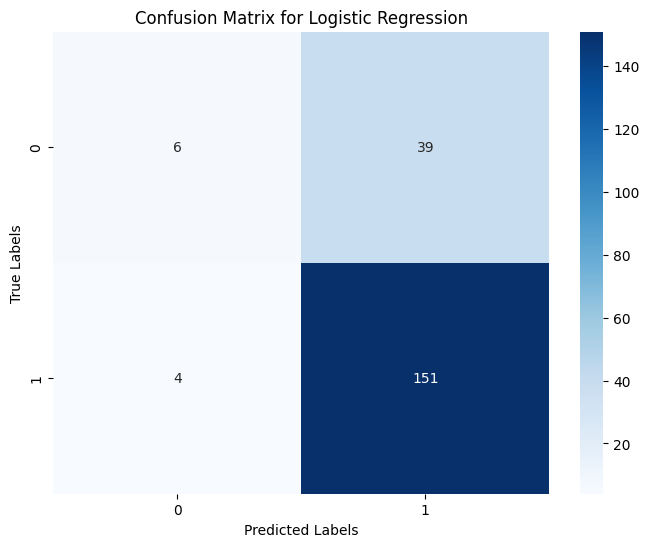

In [122]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg
                              , labels=log_reg_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg_model.classes_,
            yticklabels=log_reg_model.classes_)
plt
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



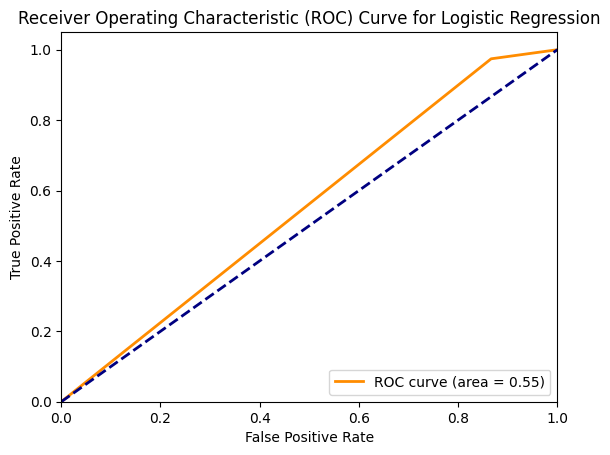

In [123]:
#ROC-AUC (for binary classification)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

###**4.2 Model Comparison**

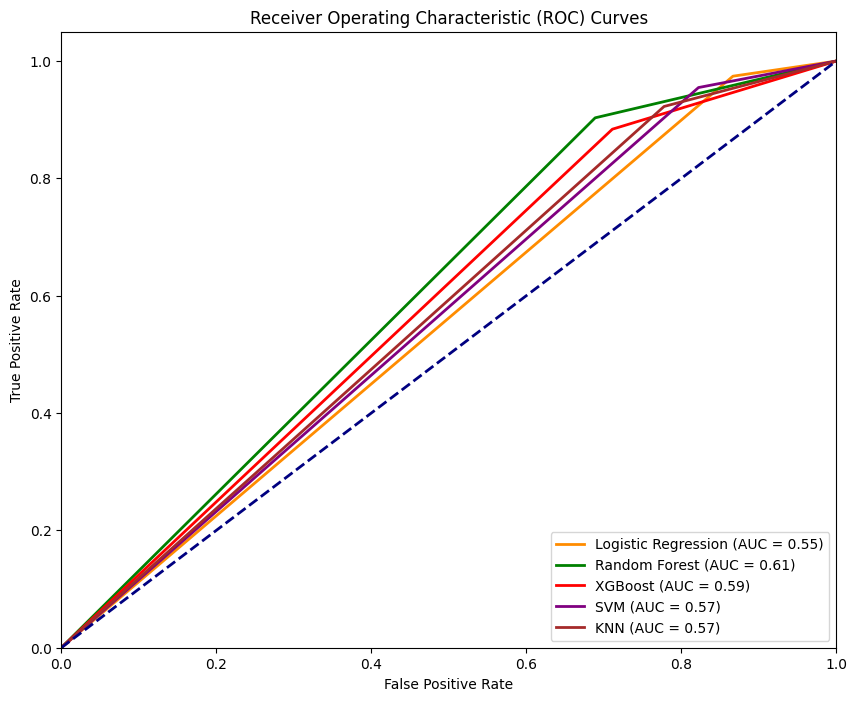

In [125]:
# Calculate ROC curve and AUC for other models
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='brown', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

###**Observations**
This plot provides a visual comparison of how well each model discriminates between the 'Pass' and 'Fail' classes.
A curve that is closer to the top-left corner indicates better performance, and a higher AUC value suggests a better model.

Random Forest has the highest AUC (0.61), suggesting it has the best overall discriminative ability among the models.
XGBoost has the second highest AUC (0.59).
SVM and KNN have similar AUC values (0.57).
Logistic Regression has the lowest AUC (0.55).

###**Part 5: Hyperparameter Tuning**

###**5.1 Hyperparameter selection**

In [127]:
#Random Forest model hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,
                     200,
                     300],
    'max_depth': [None,
                  10,
                  20],
    'min_samples_split': [2,
                          5,
                          10],
    'min_samples_leaf': [
        1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


###**5.3 Before Vs After Comparison**

In [128]:
#Comparison model performance metrics before tuning
from sklearn.metrics import accuracy_score, classification_report
# Before tuning
rf_model_before = RandomForestClassifier(random_state=42)
rf_model_before.fit(X_train, y_train)
y_pred_before = rf_model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
report_before = classification_report(y_test, y_pred_before)
print("Before Tuning - Random Forest Accuracy:", accuracy_before)
print("\nBefore Tuning - Random Forest Classification Report:\n", report_before)

Before Tuning - Random Forest Accuracy: 0.745

Before Tuning - Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.20      0.26        46
           1       0.79      0.91      0.85       154

    accuracy                           0.74       200
   macro avg       0.59      0.55      0.55       200
weighted avg       0.70      0.74      0.71       200



In [129]:
#Model performance metrics after tuning
best_model = grid_search.best_estimator_
y_pred_after = best_model.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
report_after = classification_report(y_test, y_pred_after)
print("After Tuning - Random Forest Accuracy:", accuracy_after)
print("\nAfter Tuning - Random Forest Classification Report:\n", report_after)

After Tuning - Random Forest Accuracy: 0.77

After Tuning - Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.09      0.15        46
           1       0.78      0.97      0.87       154

    accuracy                           0.77       200
   macro avg       0.64      0.53      0.51       200
weighted avg       0.72      0.77      0.70       200



In [130]:
#parameter values used in both cases
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [131]:
#Improvement achieved (percentage or absolute)
improvement = (accuracy_after - accuracy_before) / accuracy_before * 100
print("Improvement achieved: {:.2f}%".format(improvement))

Improvement achieved: 3.36%


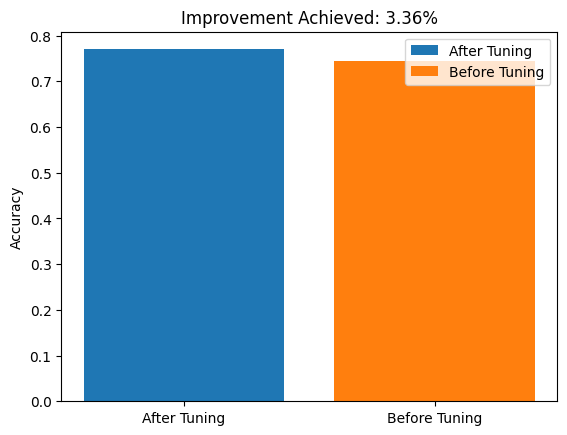

In [132]:
#Visualise the improvement achieved
import matplotlib.pyplot
improvement = (accuracy_after - accuracy_before) / accuracy_before * 100
plt.bar(1, accuracy_after, label='After Tuning')
plt.bar(2, accuracy_before, label='Before Tuning')
plt.xticks([1, 2], ['After Tuning', 'Before Tuning'])
plt.ylabel('Accuracy')
plt.title('Improvement Achieved: {:.2f}%'.format(improvement))
plt.legend()
plt.show()



###**5.4 Cross Validation**

In [133]:
#use k-fold cross-validation (k=5)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-Validation Results:", cv_results)
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())

Cross-Validation Results: [0.8375  0.7625  0.84375 0.80625 0.81875]
Mean Accuracy: 0.81375
Standard Deviation: 0.028885550020728373


In [134]:
#Ensure robust evaluation
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Results:", cv_results)
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())


Cross-Validation Results: [0.8125  0.825   0.8125  0.7875  0.81875]
Mean Accuracy: 0.81125
Standard Deviation: 0.012747548783981958


###Finalize model:Train the Random Forest model with the best hyperparameters on the entire training dataset.


In [135]:
# Finalize the Random Forest model with the best hyperparameters
final_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [61]:
# Predict on the validation set
y_pred_val = final_rf_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
report_val = classification_report(y_val, y_pred_val)
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)

print("Validation Set Accuracy:", accuracy_val)
print("\nValidation Set Classification Report:\n", report_val)
print("\nValidation Set Confusion Matrix:\n", confusion_matrix_val)

Validation Set Accuracy: 0.815

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.15      0.24        40
           1       0.82      0.98      0.89       160

    accuracy                           0.81       200
   macro avg       0.74      0.57      0.57       200
weighted avg       0.79      0.81      0.76       200


Validation Set Confusion Matrix:
 [[  6  34]
 [  3 157]]



###Predict on the test set and evaluate the model using accuracy, classification report, and confusion matrix.



In [136]:
# Predict on the test set
y_pred_test = final_rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Test Set Accuracy:", accuracy_test)
print("\nTest Set Classification Report:\n", report_test)
print("\nTest Set Confusion Matrix:\n", confusion_matrix_test)

Test Set Accuracy: 0.77

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.09      0.15        46
           1       0.78      0.97      0.87       154

    accuracy                           0.77       200
   macro avg       0.64      0.53      0.51       200
weighted avg       0.72      0.77      0.70       200


Test Set Confusion Matrix:
 [[  4  42]
 [  4 150]]



Analyze from the best Random Forest model to understand which features are most influential.


In [137]:
# Get feature importances
feature_importances = final_rf_model.feature_importances_
features_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
features_df = features_df.sort_values('importance', ascending=False)
print("Feature Importances:")
display(features_df)

Feature Importances:


,feature,importance
13,lunch_free/reduced,0.119365
14,lunch_standard,0.114793
16,test preparation course_none,0.082694
0,gender_female,0.064604
9,parental level of education_high school,0.063602
15,test preparation course_completed,0.061418
3,race/ethnicity_group B,0.060024
12,parental level of education_some high school,0.056609
1,gender_male,0.056014
5,race/ethnicity_group D,0.054083


## **Observations**

*   The finalized Random Forest model achieved an accuracy of 0.815 on the validation set and 0.77 on the test set.
*   On the validation set, the model showed high precision (0.82) and recall (0.98) for class 1(pass) but low recall (0.15) for class 0 (fail).
*   On the test set, the model also performed well for class 1 (precision 0.78, recall 0.97) but poorly for class 0 (precision 0.50, recall 0.09).
*   The confusion matrix on the validation set showed 34 instances of class 0 were misclassified as class 1.
*   The confusion matrix on the test set showed 42 false positives (class 0 predicted as class 1) and only 4 true positives for class 0.
*   The most important features identified by the model are lunch_free/reduced, lunch standard, test preparation course_none, gender_female and parental level of education_high school.

### **Recommendations**

*   The model exhibits a significant class imbalance in performance, struggling to correctly identify the minority class (fail/class 0). Further steps should explore techniques to address this imbalance, such as resampling methods or using different evaluation metrics that are less sensitive to imbalance.
*   The feature importances highlight that lunch status is a strong predictor. Further investigation into the relationship between lunch status and the target variable could provide valuable insights.



#####  ***********End of Assignment *************